# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and  evenue.

    ● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
    
    ● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
    
    ● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,   accounting for inflation over time.
    

### Question(s) for Analysis

        ● Which years have the most popular movies? 
        
        ● Which genres have the most popular movies? 
      
        ● What kinds of properties are associated with movies that have high revenues?
        
 

In [1]:
# Import statements for all of the packages.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [3]:
# Load your data and print out a few lines. 
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Chech the Data Shape
df.shape

(10866, 21)

Data is consisting of 10,866 Movie with 21 identification properties

In [5]:
df.duplicated().sum()

1

There is only one duplicated row, I will iliminate in the data cleaning phase 

In [6]:
# Check Unique Data
df['id'].nunique()

10865

There are 10,865 movie but 10,866 rows which means that there is one movie duplicated

In [7]:
# Check Duplicated Data
df['id'].duplicated().sum()

1

This confirms that we have one duplicated ID

In [8]:
# Check the Duplicated movie
df.duplicated(['id','original_title']).sum()

1

This means that there is one movie has 2 IDs

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Not all of the 21 Columns have 10,866 entries, which means that some movies are missing part of their classifying properties in 9 columns. The good news are that we have the columns of the  "release_year", "popularity"  and the "revenue" in the  "int64" & "float64" formats and no need for conversion

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Since the "popularity" & "release_year" columns has minimum values, then there are no rows without values. While the mean value for revenues is 3.9 while the maximum value is 2.7e9 which may reflects many zero revenue movies, taking into consideration the minimum value for "revenue" column is 0

In [11]:
df.describe(include = 'all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [12]:
no_revenues = df.query('revenue == "0"')
no_revenues.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


This reflects that we have 6,016 movies without revenues data from the total of 10,065 unique movies , i wil drop these rows in the data cleaning

### Data Cleaning

In [13]:
# remove the duplicated data 
df.drop_duplicates(inplace=True)
df['id'].duplicated().sum()

0

I droped the duplicated id

In [14]:
# remove the unnecessary data
df.drop(['id','imdb_id','homepage','tagline','overview','release_date','vote_count','budget_adj','revenue_adj','production_companies','keywords'], axis = 1, inplace = True)

I droped the unnecessary columns and left those which i may need in the analysis

In [15]:
df.dropna()
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


Droped the missing data in the data frame 

In [16]:
df = df[df['revenue'] > 0]
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


I dropped the movies that has no revenues data in the data frame 

### Data Wrangling Summary

Firstly I collected the data from the csv file. Then I assested the data structure & type to identify the required cleaning actions. At the last I removed the duplicated & the unnecessary data, and I left the data wich will help in answering the two analysis questions.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section.



You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

## General Overview

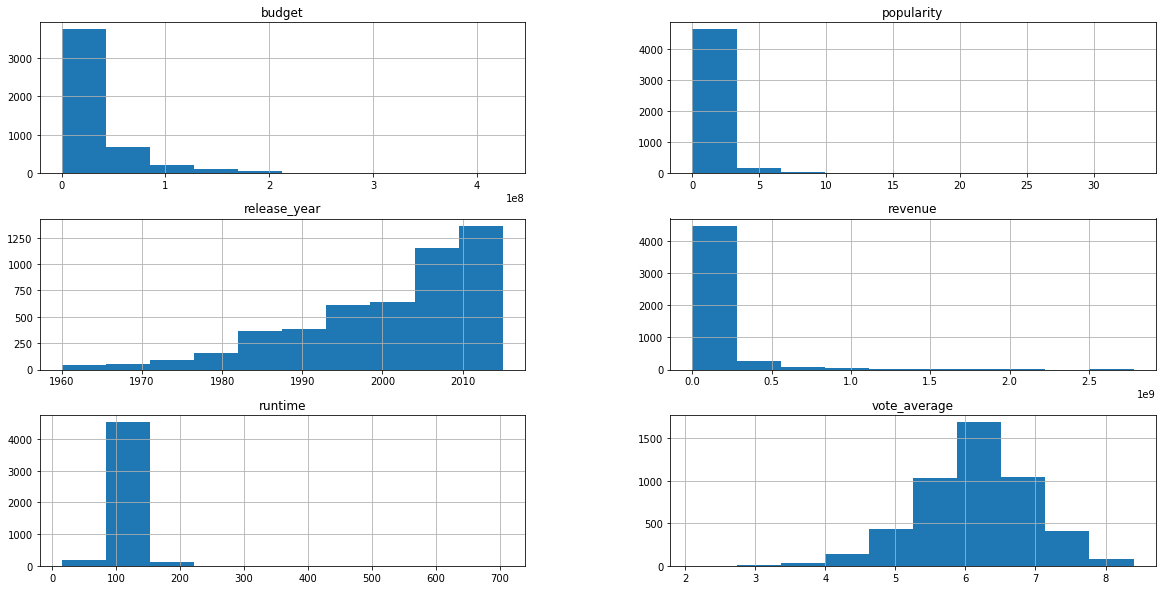

In [17]:
# Display the trimmed data on charts 
df.hist(figsize=(20,10));

The overview reflects:

Most of the movies released between 2000 & 2015

We have small number of movies with  popularity value exceeding 3

We have small number of movies with  revenues  exceeding 0.25*e9 

### Research Question 1  (popularity?)

In [18]:
# Continue to explore the data to address your additional research questions.
# Add more headers as needed if you have more questions to investigate.

In [19]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'vote_average', 'release_year'],
      dtype='object')

In [20]:
df['release_year'].value_counts()

2013    244
2011    241
2014    228
2010    217
2012    216
2015    216
2008    206
2006    206
2009    200
2007    195
2005    184
2004    164
2002    139
2003    139
2001    128
1999    118
2000    111
1993    108
1997    107
1998    106
1996    104
1995    100
1994     87
1992     82
1988     81
1990     77
1989     77
1986     76
1987     72
1991     70
1985     67
1984     53
1983     52
1981     40
1982     40
1980     39
1979     27
1978     24
1977     24
1974     17
1973     17
1976     16
1975     15
1967     14
1971     14
1970     13
1968     12
1972     10
1961     10
1962      9
1964      8
1963      7
1960      7
1966      5
1965      5
1969      5
Name: release_year, dtype: int64

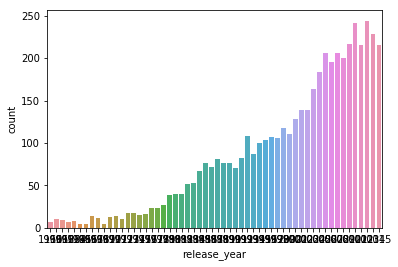

In [21]:
snb.countplot(x='release_year', data= df)

In [22]:
# Display the popularity of movies over the years
df.groupby('release_year')['popularity'].mean().sort_values(ascending=False)

release_year
2015    2.321132
2014    2.024154
1964    1.283817
2013    1.184809
2012    1.145582
2003    1.102432
2011    1.073960
2009    1.067116
1977    1.055948
1965    1.054877
2010    1.040487
2004    1.035107
2001    1.034588
2002    1.031599
1972    1.030583
1960    1.018142
1994    0.994036
1963    0.992652
1969    0.984609
1975    0.976771
2008    0.964408
1999    0.944122
2005    0.943153
1979    0.936440
1995    0.930924
2007    0.924901
1971    0.921678
1997    0.900539
1967    0.895691
2006    0.885180
1973    0.872754
1998    0.860089
1976    0.857908
1984    0.844544
1996    0.839807
2000    0.824962
1982    0.824641
1962    0.816158
1989    0.788080
1961    0.787718
1974    0.771906
1968    0.762328
1992    0.740461
1985    0.739571
1980    0.726854
1990    0.684488
1987    0.684090
1993    0.672628
1981    0.671018
1978    0.662996
1983    0.645662
1991    0.640665
1986    0.619610
1988    0.602369
1970    0.560482
1966    0.395168
Name: popularity, dtype: float64

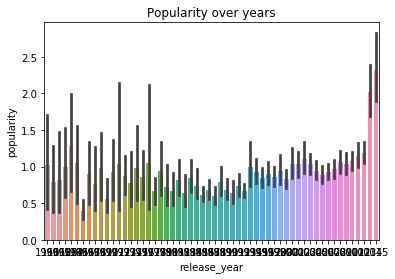

In [23]:
snb.barplot(x='release_year', y='popularity', data=df)
plt.title('Popularity over years')
plt.figure(figsize=(80,20))
plt.show()

years with very high number of movies have high popularity mean (2014 & 2015), also years with very small number of movies have high popularity mean (1964) 

In [24]:
#Because we have large number of movies with popularity between 0 & 3 , i will filter the high popular movies
# Filtering the high popular movies 
popular_movies = df[df['popularity'] > 3]

In [25]:
popular_movies['release_year'].value_counts()

2015    46
2014    43
2013    19
2012    15
2009    13
2011     9
2010     9
2006     9
2008     8
2005     8
2004     8
2003     7
2002     7
2001     5
1999     4
1997     4
1994     4
1995     3
1992     3
1983     2
1996     2
2007     2
1991     2
1989     2
2000     2
1979     1
1964     1
1968     1
1971     1
1972     1
1974     1
1975     1
1977     1
1998     1
1980     1
1981     1
1982     1
1984     1
1985     1
1987     1
1988     1
1962     1
Name: release_year, dtype: int64

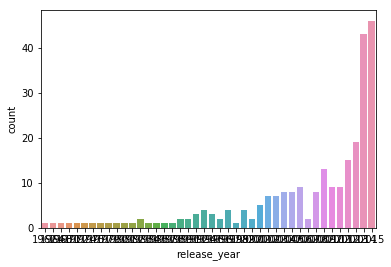

In [26]:
snb.countplot(x='release_year', data= popular_movies)

In [27]:
popular_movies.groupby('release_year')['popularity'].mean().sort_values(ascending=False)

release_year
1977    12.037933
1994     6.696112
2015     6.386906
1985     6.095293
2014     6.055264
1999     5.945888
1972     5.738034
2001     5.617703
2003     5.532992
1980     5.488441
2010     5.005837
1979     4.935897
2007     4.921776
1984     4.831966
2011     4.810617
2012     4.644706
1981     4.578300
2002     4.557201
2009     4.516074
2008     4.395376
2013     4.322664
1982     4.215642
1998     4.180540
1995     4.162686
1992     4.125301
2005     4.020047
1983     4.003836
2004     3.919555
1996     3.887060
1989     3.840120
1988     3.777441
2006     3.768068
1991     3.718338
2000     3.683539
1997     3.518749
1987     3.474728
1968     3.309196
1974     3.264571
1975     3.258151
1962     3.170651
1964     3.153791
1971     3.072555
Name: popularity, dtype: float64

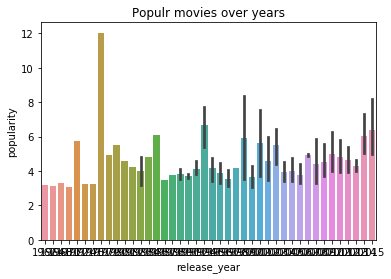

In [28]:
snb.barplot(x='release_year', y='popularity', data=popular_movies)
plt.title('Populr movies over years')
plt.figure(figsize=(80,20))
plt.show()

Here we can see that year 1977 has a significant popularity mean for movies with relative high popularity values

In [29]:
popular_movies.nlargest(10,'popularity')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,8.0,2014
630,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,7.9,2014
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,7.6,2014
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,7.9,1977
632,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,7.0,2014
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,6.6,2014


In [30]:
#Does the populartity affected by the revenues?
popular_movies.groupby('revenue')['popularity'].mean().sort_values(ascending=False)

revenue
1513528810    32.985763
378436354     28.419936
621752480     24.949134
773312399     14.311205
295238201     13.112507
714766572     12.971027
775398007     12.037933
78739897      11.422751
2068178225    11.173104
752100229     10.739009
955119788     10.174599
2781505847     9.432768
825500000      9.363643
1506249360     9.335014
532950503      9.110700
100853753      8.947905
652105443      8.691294
440603537      8.654359
871368364      8.575419
1001921825     8.466668
233555708      8.110711
926287400      8.095275
213928762      8.093754
976475550      8.021423
370569774      7.959228
463517383      7.753899
595380321      7.667400
1519557910     7.637767
1156730962     7.404165
28341469       7.192039
                ...    
121201940      3.170271
786636033      3.161670
886686817      3.154914
124900000      3.153791
589390539      3.153414
459270619      3.153060
201585328      3.151021
136621271      3.149930
660940780      3.145562
609016565      3.140080
87724478

It is clear that high popular movies have higher average revenue than the other lower popular one

In [31]:
# Now i am going to compare between years of highly popular means 
popularity_2015 = df.release_year==2015
popularity_2014 = df.release_year==2014
popularity_1977 = df.release_year==1977
popularity_1964 = df.release_year==1964

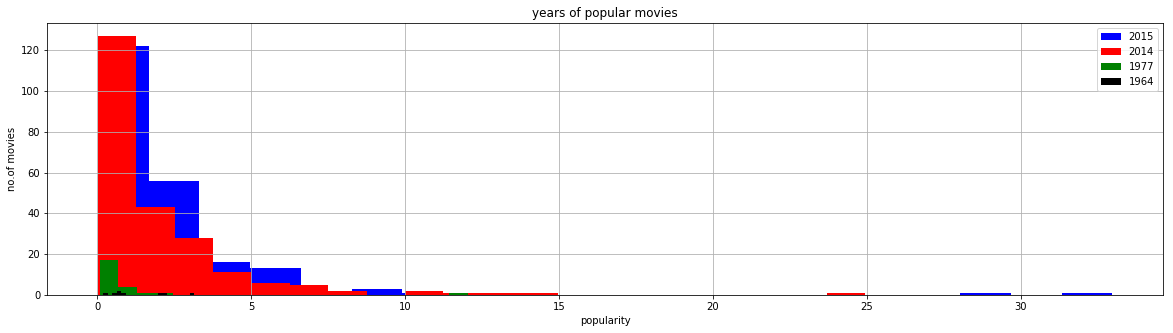

In [32]:
# Does the populartity effect over the years?
def popularity_over_years(df,col_name,y15,y14,y77,y64):
    plt.figure(figsize=[20,5])
    df[col_name][popularity_2015].hist(alpha=1,bins=20,color='blue',label = '2015')
    df[col_name][popularity_2014].hist(alpha=1,bins=20,color='red',label = '2014')
    df[col_name][popularity_1977].hist(alpha=1,bins=20,color='green',label = '1977')
    df[col_name][popularity_1964].hist(alpha=1,bins=20,color='black',label = '1964')
    plt.legend()
    plt.title('years of popular movies')
    plt.xlabel('popularity')
    plt.ylabel('no.of movies')
popularity_over_years(df,'popularity', popularity_2015, popularity_2014, popularity_1977, popularity_1964)

This clearly reflects that we have a very small number of movies with very highy popularity value, and very large number of movies with low popularity value 

In [33]:
# Divide the movies into genres groups
action = df.genres=="Action"
adventure = df.genres=="Adventure"
science_fiction = df.genres=="Science Fiction"
thriller = df.genres=="Thriller"
fantasy = df.genres=="Fantasy"
crime = df.genres=="Crime"
western = df.genres=="Western"
drama = df.genres=="Drama"
family = df.genres=="Family"
animation = df.genres=="Animation"
comedy = df.genres=="Comedy"
romance = df.genres=="Romance"
history = df.genres=="History"
mystery = df.genres=="Mystery"
horror = df.genres=="Horror"

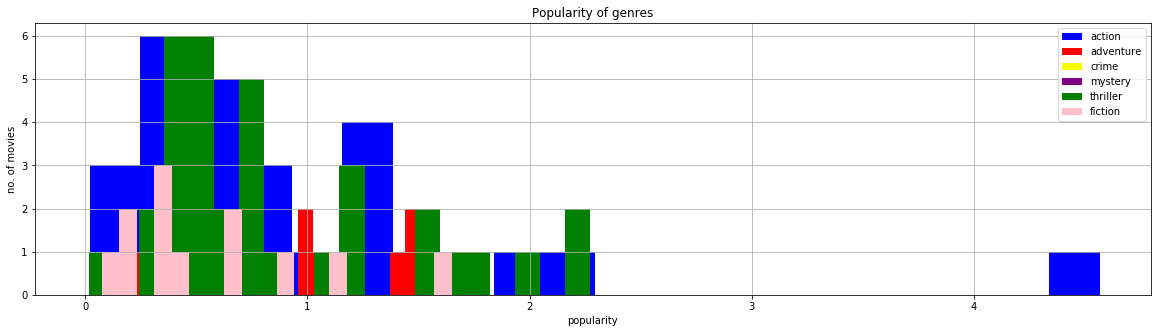

In [34]:
# genres popularity
def genres (df,col_name,action,adventure,crime,mystery,thriller,fiction,horror):# setting
    plt.figure(figsize=[20,5])
    df[col_name][action].hist(alpha=1,bins=20,color='blue',label='action')
    df[col_name][adventure].hist(alpha=1,bins=20,color='red',label='adventure')
    df[col_name][crime].hist(alpha=1,bins=20,color='yellow', label='crime')
    df[col_name][mystery].hist(alpha=1,bins=20,color='purple',label='mystery')
    df[col_name][thriller].hist(alpha=1,bins=20,color='green',label='thriller')
    df[col_name][science_fiction].hist(alpha=1,bins=20,color='pink',label='fiction')
    plt.legend()
    plt.title('Popularity of genres')
    plt.xlabel('popularity')
    plt.ylabel('no. of movies')
genres(df,'popularity',action,adventure,crime,mystery,thriller,science_fiction,horror)

I can see highly popular action movie and many less popular 

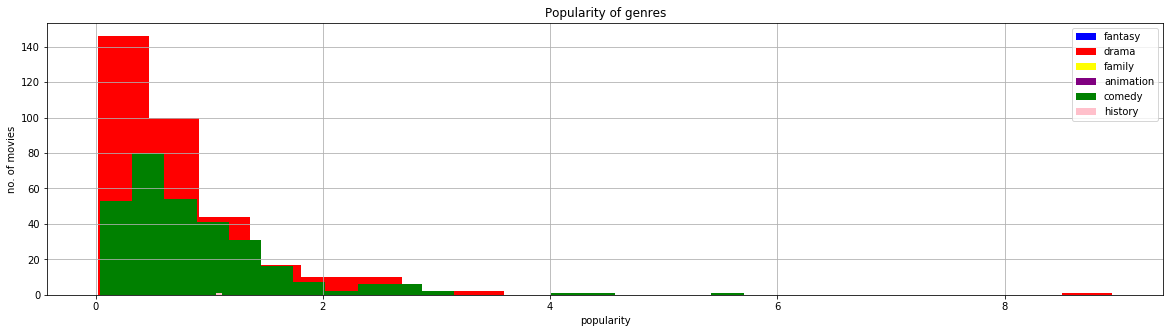

In [35]:
# genres popularity 
def genres (df,col_name,fantasy,drama,family,animation,comedy,history):# setting
    plt.figure(figsize=[20,5])
    df[col_name][fantasy].hist(alpha=1,bins=20,color='blue',label='fantasy')
    df[col_name][drama].hist(alpha=1,bins=20,color='red',label='drama')
    df[col_name][family].hist(alpha=1,bins=20,color='yellow', label='family')
    df[col_name][animation].hist(alpha=1,bins=20,color='purple',label='animation')
    df[col_name][comedy].hist(alpha=1,bins=20,color='green',label='comedy')
    df[col_name][history].hist(alpha=1,bins=20,color='pink',label='history')
    plt.legend()
    plt.title('Popularity of genres')
    plt.xlabel('popularity')
    plt.ylabel('no. of movies')
genres(df,'popularity',fantasy,drama,family,animation,comedy,history)

### Research Question 2 (What Kinds of properties are associated with movies that have high revenues?)


In [36]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

In [37]:
# form sorted dataframe by revenues 
sorted_revenues = df.sort_values('revenue')
sorted_revenues['revenue'].sort_values(ascending=False)

1386     2781505847
3        2068178225
5231     1845034188
4361     1519557910
0        1513528810
4        1506249360
14       1405035767
3374     1327817822
5422     1274219009
5425     1215439994
8        1156730962
3522     1123746996
4949     1118888979
4365     1108561013
8094     1106279658
4363     1081041287
6555     1065659812
1930     1063171911
1921     1025467110
3375     1021683000
4367     1017003568
2875     1001921825
2634      976475550
5434      970761885
7387      961000000
5431      958400000
634       955119788
1923      954305868
7388      938212738
1389      933959197
            ...    
7901             32
4675             30
9401             29
10297            27
5060             23
10045            20
8944             16
10050            16
8125             16
3853             15
9109             15
10294            15
9390             13
2519             13
7158             12
10777            11
5852             11
8235             11
2252             10


In [38]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'vote_average', 'release_year'],
      dtype='object')

In [39]:
#choosing the movies that exceeds 1 bn $
top_22_movies = df.nlargest(22,'revenue')[['original_title','revenue','vote_average','popularity','director','cast','genres']]
top_22_movies.head()

,original_title,revenue,vote_average,popularity,director,cast,genres
1386,Avatar,2781505847,7.1,9.432768,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Action|Adventure|Fantasy|Science Fiction
3,Star Wars: The Force Awakens,2068178225,7.5,11.173104,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy
5231,Titanic,1845034188,7.3,4.355219,James Cameron,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,Drama|Romance|Thriller
4361,The Avengers,1519557910,7.3,7.637767,Joss Whedon,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Science Fiction|Action|Adventure
0,Jurassic World,1513528810,6.5,32.985763,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller


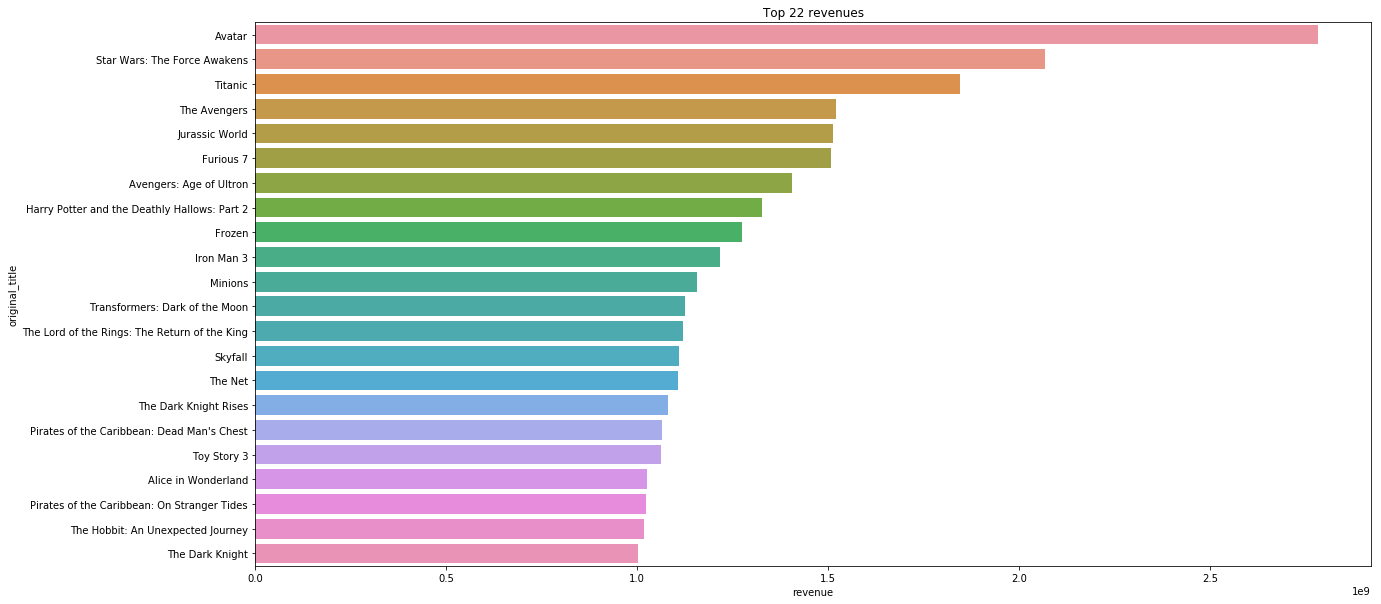

In [40]:
plt.figure(figsize=(20,10))
snb.barplot(x='revenue', y='original_title', data=top_22_movies)
plt.title('Top 22 revenues')
plt.show()

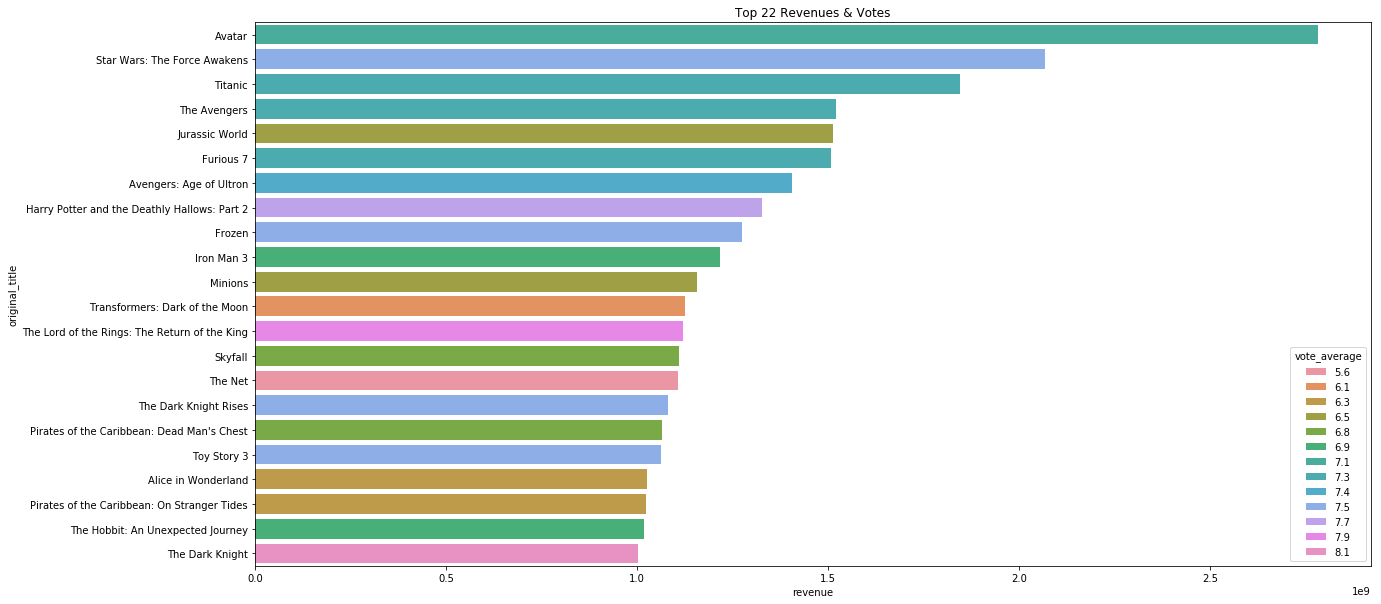

In [41]:
#explore the relation between top revenues and vote average 
plt.figure(figsize=(20,10))
snb.barplot(x='revenue', y='original_title', data=top_22_movies, hue='vote_average',dodge=False)
plt.title('Top 22 Revenues & Votes')
plt.show()

It doesn't look that we have a clear relation 

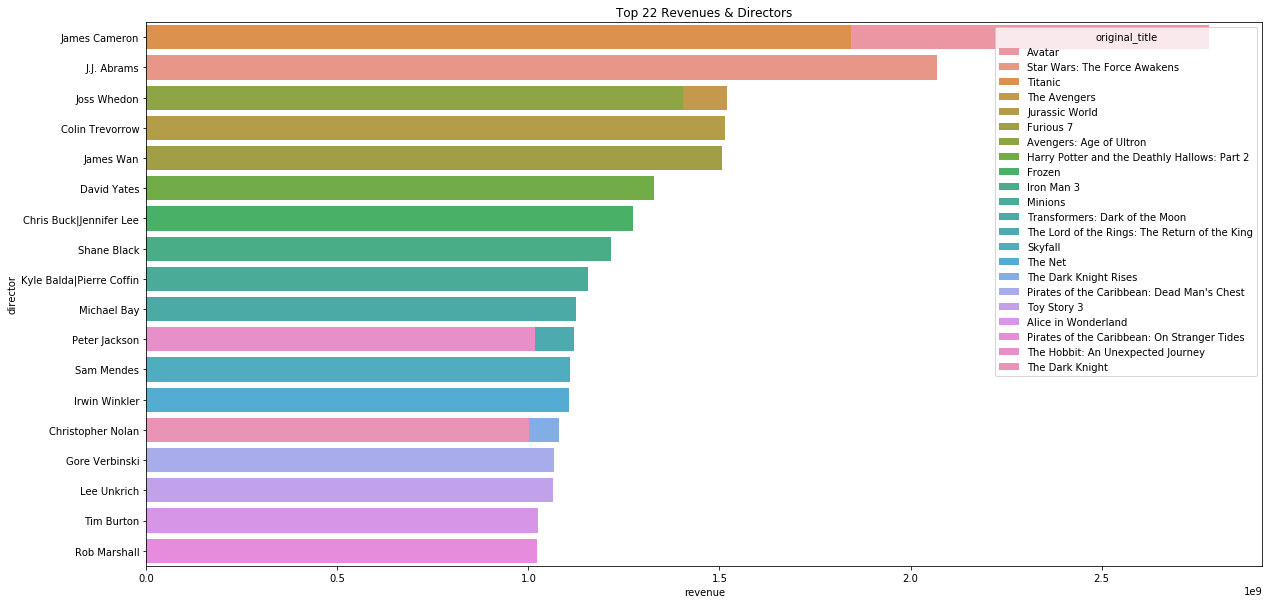

In [42]:
#explore the relation between top revenues and directors 
plt.figure(figsize=(20,10))
snb.barplot(x='revenue', y='director', data=top_22_movies, hue='original_title',dodge=False)
plt.title('Top 22 Revenues & Directors')
plt.show()

It looks like a clear relation for director of the high revenues 

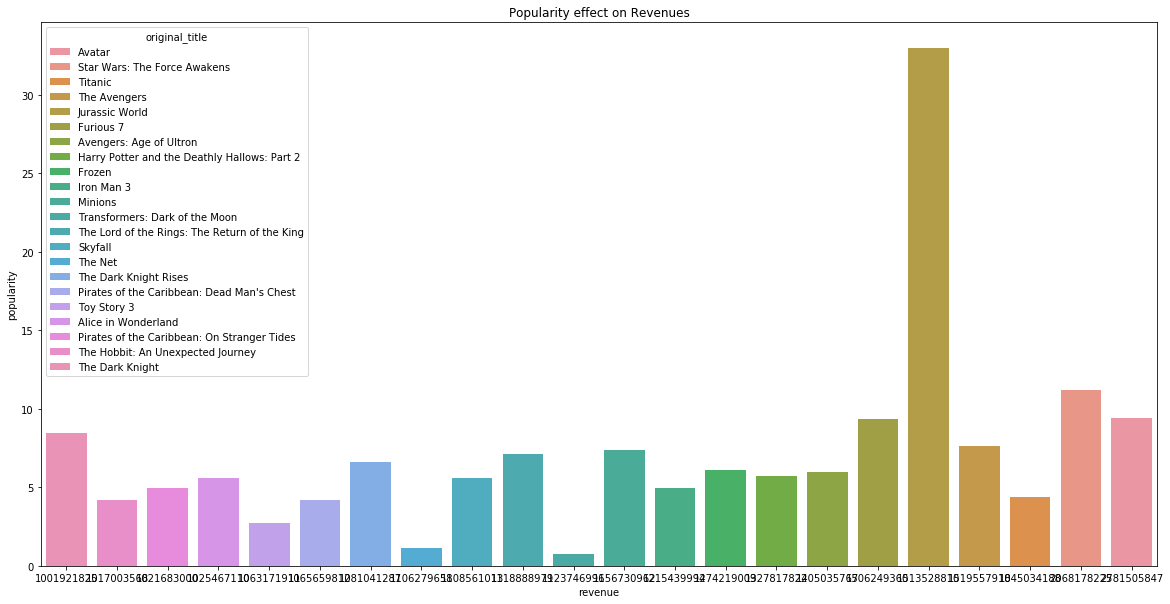

In [44]:
plt.figure(figsize=(20,10))
snb.barplot(x='revenue', y='popularity', data=top_22_movies,hue='original_title',dodge=False)
plt.title('Popularity effect on Revenues')
plt.show()

Popularity of the movies cant't give a clear relation withh its revenue, it can tell us that jurassic world movie has both high revenues and popularity 

<a id='conclusions'></a>
## Conclusions

For the popularity, the years with very large numbers of movies (from year 2009 to 2015) having high popularity mean, not because of a high popular movies but because of the large number of movies that affects the mean.

However, we can see years 2014 $ 2015 with vey high popularity mean although we have almost the same high number of movies from year 2009. This reflects an actual increase in the popularity for those two years

on the same context the years with very small numbers of movies (from year 1960 to 1965) also having high popularity mean, which reflects a very small number of highly popular movies.

With this in mind, we can see the major difference after filtering the high popular movies, movies for year 1977 was highly popular but were only one movie.

By sorting the high popular movies we can see that the top 10 movies are from years 2015 & 2014 . It was also clear that the top 3 movies have very high popularity that affects the average clearly


on the other hand, testing the the effect of the genres, we can see that action, thriller, and drama was the genres with high popularity rate 


For the second question, the sorting by revenues shows the highest revenue movies, I plotted the high revenue movies with the average votes, director, and popularity. graphs didn't give any clear relation between revenues and these factors 

Limitations: 

 - Popularity was tested by only two factors (revenues & Genres)
 - Popularity was tested over years to clarify that number of movies affects the average score 
 - Top revenues was determined by the one exceeds one billion dollar
 - revenues was tested by only three properties (vote average, director, popularity)



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0